# ___Density-Based Spatial Clustering of Applications with Noise (DBSCAN)- Unsupervised Machine Learning___
---

## ___What is DBSCAN?___

_DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular unsupervised learning method utilized in model building and machine learning algorithms. DBSCAN is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density. It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away)._

_It works based on two parameters: Epsilon and Minimum Points_
* ___Epsilon___ _determine a specified radius that if includes enough number of points within, we call it dense area_
* ___minimumSamples___ _determine the minimum number of data points we want in a neighborhood to define a cluster._

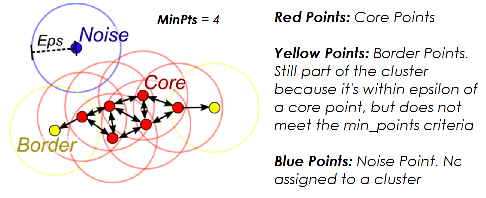

* ___Core Point___ _: A point is a core point if it has more than MinPts points within eps._
* ___Border Point___ _: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point._
* ___Noise or outlier___ _: A point which is not a core point or border point._

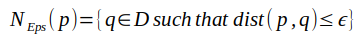

## ___Why DBSCAN?___
_K-means and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data._

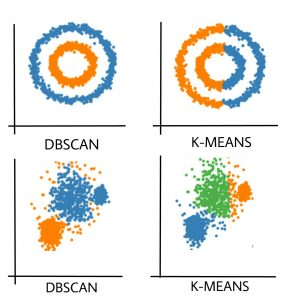

_Real life data may contain irregularities, like_
* _Data may contain noise._
* _Clusters can be of arbitrary shape such as:_

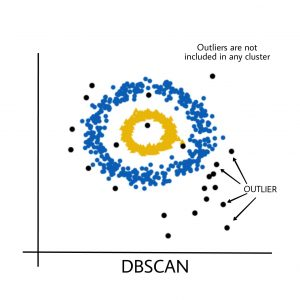

_The figure shows a data set containing nonconvex clusters and outliers/noises. Given such data, k-means algorithm has difficulties for identifying these clusters with arbitrary shapes._

## ___DBSCAN Parameters___

* ___eps___ _: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph._


* ___MinPts___ _: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, $MinPts >= D+1$ or $MinPts = D*2$. The minimum value of MinPts must be chosen at least 3._

## ___How DBSCAN algorithm works?___

* _Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors._
* _For each core point if it is not already assigned to a cluster, create a new cluster._
* _Find recursively all its density connected points and assign them to the same cluster as the core point._
* _A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a._
* _Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise._

<img src="https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif" width="50%" height="50%">

## ___DBSCAN Reachability and Connectivity___

### ___Reachability___

#### ___Directly Density Reachable___
_An object (or instance) q is directly density reachable from object p if q is within the ε-Neighborhood of p and p is a core object._

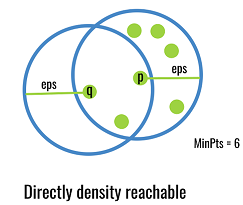

_Here directly density reachability is not symmetric. Object p is not directly density-reachable from object q as q is not a core object._

#### ___Density Reachable___
_An object q is density-reachable from p w.r.t ε and MinPts if there is a chain of objects q1, q2…, qn, with q1=p, qn=q such that qi+1 is directly density-reachable from qi w.r.t ε and MinPts for all 1 <= i <= n_

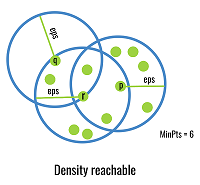

_Here density reachability is not symmetric. As q is not a core point thus qn-1 is not directly density-reachable from q, so object p is not density-reachable from object q._

### ___Connectivity___

#### ___Density connectivity___ 
_Object q is density-connected to object p w.r.t ε and MinPts if there is an object o such that both p and q are density-reachable from o w.r.t ε and MinPts._

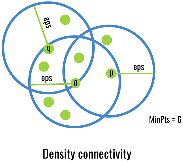

_Here density connectivity is symmetric. If object q is density-connected to object p then object p is also density-connected to object q._

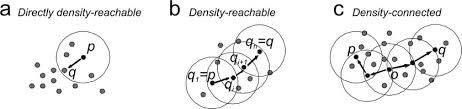

_Based on the above two concepts reachability and connectivity we can define the cluster and noise points._

___Cluster___
_A cluster C w.r.t. ε and MinPts is a non empty subset of D (the whole set of objects or instances) satisfying_

* ___Maximality___ _: For all objects p, q if p ε C and if q is density-reachable from p w.r.t ε and MinPts then q ε C._
* ___Connectivity___ _: For all objects p, q ε C, p is density-connected to q and vice-versa w.r.t. ε and MinPts._

___Noise___
_Objects which are not directly density-reachable from at least one core object are known as __Noise points__._

In [1]:
# Packages / libraries

import os #provides functions for interacting with the operating system

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## ___DBSCAN Model using sklearn___

In [2]:
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 

In [3]:
# The function below will generate the data points and requires these inputs:
# 
# centroidLocation: Coordinates of the centroids that will generate the random data.
# Example: input: [[4,3], [2,-1], [-1,4]]
# numSamples: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation)
# Example: 1500
# clusterDeviation: The standard deviation between the clusters. The larger the number, the further the spacing.
# Example: 0.5

def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, 
                      centers=centroidLocation, 
                      cluster_std=clusterDeviation)
    
    return X, y

In [4]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

In [5]:
X

array([[ 4.14813625,  2.86438391],
       [-1.12346504,  3.71890408],
       [-0.81905185,  4.66890599],
       ...,
       [-0.15323309,  3.97313051],
       [-0.38542619,  4.20666675],
       [ 2.90651543, -0.81691313]])

In [6]:
X = StandardScaler().fit_transform(X)

```DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)```

In [7]:
from sklearn.cluster import DBSCAN 

dbscan_model = DBSCAN(eps=0.3, min_samples=7)
dbscan_model.fit(X)

DBSCAN(eps=0.3, min_samples=7)

In [8]:
labels = dbscan_model.labels_
labels

array([0, 1, 1, ..., 1, 1, 2], dtype=int64)

In [9]:
len(set(labels))

4

In [10]:
dbscan_model.core_sample_indices_

array([   0,    1,    2, ..., 1497, 1498, 1499], dtype=int64)

In [11]:
# Idenfying Outliers

# Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 
# 'False' if the points are outliers.

# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool)
core_samples_mask[dbscan_model.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [13]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [14]:
len(unique_labels)

4

In [15]:
n_noise_ = list(labels).count(-1)
n_noise_

1

In [16]:
from sklearn import metrics

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 1


In [17]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))

# The V-measure is the harmonic mean between homogeneity and completeness, It measures cluster labeling given a ground truth
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Homogeneity: 1.000
Completeness: 0.996
V-measure: 0.998


In [18]:
# The Rand Index computes a similarity measure between two clusterings by considering all pairs of 
# samples and counting pairs that are assigned in the same or 
# different clusters in the predicted and true clusterings.

# ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

#The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the 
# number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

#The Adjusted Rand Index is used to measure the similarity of datapoints presents in the clusters 
# i.e., how similar the instances that are present in the cluster. 
# So, this measure should be high as possible else we can assume that the datapoints are 
# randomly assigned in the clusters.

print("Adjusted Rand Index (ARI): %0.3f"% metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information (AMI): %0.3f"% metrics.adjusted_mutual_info_score(y, labels,average_method='arithmetic'))

Adjusted Rand Index (ARI): 0.999
Adjusted Mutual Information (AMI): 0.998


In [19]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
# Negative values generally indicate 
#that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Silhouette Coefficient: 0.714


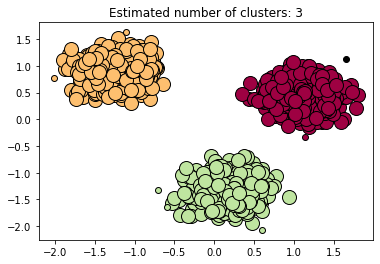

In [20]:
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## ___Difference Between DBSCAN and K-Means___

In [21]:
from sklearn import cluster, datasets

In [22]:
n_samples = 1500
noisy_circles,circle_labels = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, noise=.1)

In [23]:
noisy_moons = np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

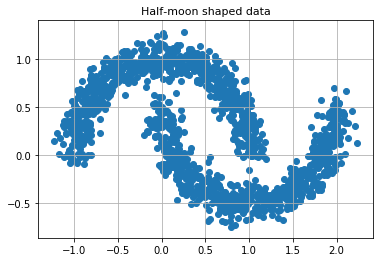

In [24]:
plt.figure(figsize=(6,4))
plt.title("Half-moon shaped data", fontsize=11)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
plt.show()

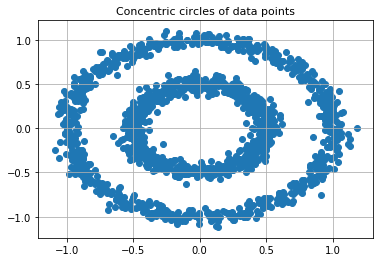

In [25]:
plt.figure(figsize=(6,4))
plt.title("Concentric circles of data points", fontsize=11)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])
plt.show()

### ___Can k-means identify the right clusters?___

In [26]:
km=cluster.KMeans(n_clusters=2)

In [27]:
km.fit(noisy_moons)

KMeans(n_clusters=2)

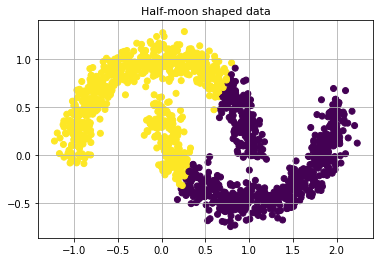

In [28]:
plt.figure(figsize=(6,4))
plt.title("Half-moon shaped data", fontsize=11)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=km.labels_)
plt.show()

In [29]:
km.fit(noisy_circles)

KMeans(n_clusters=2)

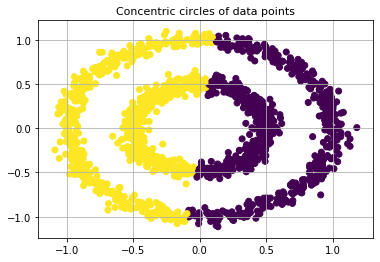

In [30]:
plt.title("Concentric circles of data points", fontsize=11)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=km.labels_)
plt.show()

### ___How does DBSCAN perform?___

In [31]:
dbs = cluster.DBSCAN(eps=0.1)

In [32]:
dbs.fit(noisy_moons)

DBSCAN(eps=0.1)

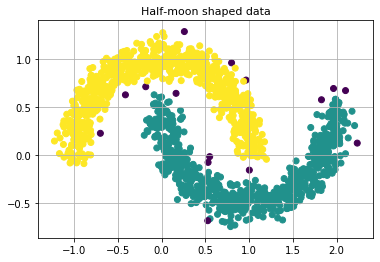

In [33]:
plt.figure(figsize=(6,4))
plt.title("Half-moon shaped data", fontsize=11)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=dbs.labels_)
plt.show()

In [34]:
dbs.fit(noisy_circles)

DBSCAN(eps=0.1)

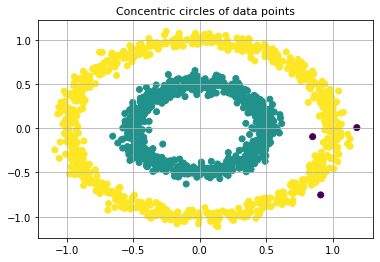

In [35]:
plt.figure(figsize=(6,4))
plt.title("Concentric circles of data points", fontsize=11)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=dbs.labels_)
plt.show()

## ___Mall Customer Model using sklearn___

In [36]:
df = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

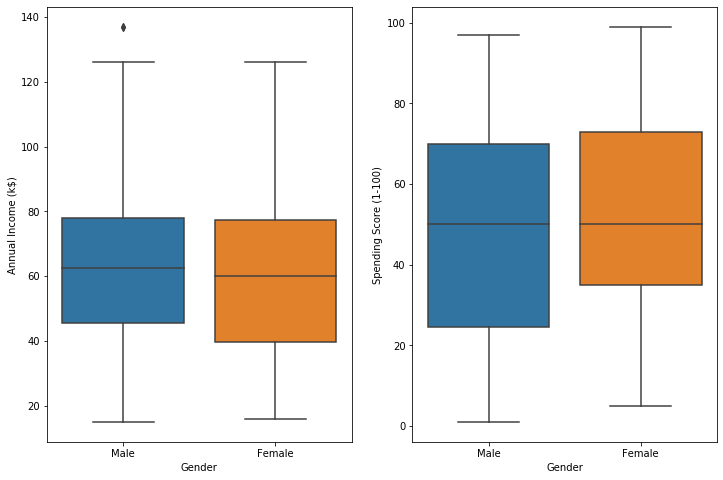

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, orient='v' , ax=axes[0])
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, orient='v' , ax=axes[1])

In [39]:
df_group_one = df[['Gender','Annual Income (k$)','Spending Score (1-100)']]
df_group_one.groupby(['Gender'],as_index=False).mean()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.250000,51.526786
1,Male,62.227273,48.511364


In [40]:
df_female = df[df['Gender'] == "Female"]
print(df_female.shape)
df_female.head()

(112, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [41]:
Percentage = (df_female.shape[0]/df.shape[0])*100
print('Female Percentage: ', round(Percentage), '%')

Female Percentage:  56 %


In [42]:
Clus_dataSet = df_female[['Age','Annual Income (k$)','Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet) # Replace NaN with zero and infinity with large finite numbers (default behaviour) or with the numbers defined by the user 
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_female['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(df_female[['Age','Annual Income (k$)','Spending Score (1-100)','Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

   Age  Annual Income (k$)  Spending Score (1-100)  Clus_Db
2   20                  16                       6       -1
3   23                  16                      77        0
4   31                  17                      40       -1
5   22                  17                      76        0
6   35                  18                       6       -1
number of labels:  {0, 1, 2, 3, -1}


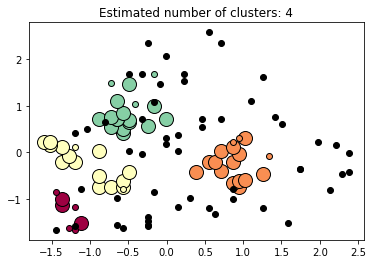

number of noise(s):  54


In [43]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [44]:
#Visualization
for clust_number in set(labels):
    clust_set = df_female[df_female.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Age: '+ str(round(np.mean(clust_set.Age)))+\
               ', Avg Income: '+ str(round(np.mean(clust_set['Annual Income (k$)'])))+\
               ', Avg Spending: '+ str(round(np.mean(clust_set['Spending Score (1-100)'])))+', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Age: 22, Avg Income: 26, Avg Spending: 78, Count: 7
Cluster 1, Avg Age: 49, Avg Income: 54, Avg Spending: 50, Count: 17
Cluster 2, Avg Age: 25, Avg Income: 52, Avg Spending: 50, Count: 16
Cluster 3, Avg Age: 32, Avg Income: 82, Avg Spending: 82, Count: 18


_we found that "Cluster 3 (average age: 32)" which highest average income and spending is the most potential customer group. The second candidate is "Cluster 0 (average age: 22)" which lowest average income but spending a lot. For some countries, "Cluster 3" will represent people who are being settled down (have a family) which spending most for their children. And "Cluster 0" will represent people who are starting a new work-life after graduated that spending most for their new society life._

## ___DBSCAN - Parameter Tuning___

### ___Credit Card Clustering Model___

In [45]:
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [46]:
X = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\CreditCard_Clustering.csv') 
  
# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 
  
print(X.head()) 

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [47]:
X.shape

(8950, 17)

In [48]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized)

In [49]:
## Reducing the dimensionality of the data to make it visualizable

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544826
2  0.330633  0.268880
3 -0.481656 -0.097612
4 -0.563512 -0.482505


### ___Choosing minPts___

_A low minPts will create clusters for outliers or noise. A low minPts means it will build more clusters from outliers, therefore we don't choose a too small value for it. minPts is best set by a domain expert who understands the data well. Unfortunately many cases we don't know the domain knowledge, especially after data is normalized._

In [50]:
# min points m = D*2
minPts = X.shape[1]*2
minPts

34

### ___Choosing epsilon (eps)___
_For epsilon, there are various aspects. It again boils down to choosing whatever works on this data set and this minPts and this distance function and this normalization. You can try to do a __kNN distance (k-distance plot) histogram__ for your dataset and choose a "knee" there, but there might be no visible one, or multiple._ 

_Basically, you compute the k-nearest neighbors (k-NN) for each data point to understand what is the density distribution of your data, for different k. the KNN is handy because it is a non-parametric method. Once you choose a minPts (which strongly depends on your data again), you fix k to that value. Then you use an epsilon the k-distance corresponding to the area of the k-distance plot (for your fixed k) with a low slope. The method proposed consists of computing the k-nearest neighbor distances in a matrix of points. The idea is to calculate the average of the distances of every point to its k nearest neighbors. The value of k will be specified by the user and corresponds to minPts. Next, these k-distances are plotted in ascending order. The aim is to determine the __“knee”__, which corresponds to the optimal eps parameter. A knee corresponds to a threshold where a sharp change occurs along the k-distance curve._

In [51]:
# ELbow Method
from sklearn.neighbors import NearestNeighbors #Unsupervised learner for implementing neighbor searches

k = minPts
nbr = NearestNeighbors(n_neighbors = k).fit(X_principal)
distance,indices = nbr.kneighbors(X_principal)

In [52]:
distance.shape

(8950, 34)

In [53]:
distance = np.round(distance,3)
distance

array([[0.   , 0.02 , 0.021, ..., 0.091, 0.092, 0.092],
       [0.   , 0.005, 0.01 , ..., 0.053, 0.055, 0.055],
       [0.   , 0.004, 0.016, ..., 0.068, 0.069, 0.069],
       ...,
       [0.   , 0.011, 0.014, ..., 0.05 , 0.051, 0.052],
       [0.   , 0.004, 0.009, ..., 0.053, 0.053, 0.053],
       [0.   , 0.006, 0.009, ..., 0.079, 0.082, 0.083]])

In [54]:
X_principal

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544826
2,0.330633,0.268880
3,-0.481656,-0.097612
4,-0.563512,-0.482505
...,...,...
8945,0.328693,-0.198293
8946,0.259752,-0.176867
8947,0.188818,-0.248155
8948,-0.313093,-0.171111


In [55]:
X_principal['distance'] = distance[:,-1] # Taking the farthest point distance
X_principal

,P1,P2,distance
0,-0.489949,-0.679976,0.092
1,-0.519099,0.544826,0.055
2,0.330633,0.268880,0.069
3,-0.481656,-0.097612,0.061
4,-0.563512,-0.482505,0.028
...,...,...,...
8945,0.328693,-0.198293,0.050
8946,0.259752,-0.176867,0.054
8947,0.188818,-0.248155,0.052
8948,-0.313093,-0.171111,0.053


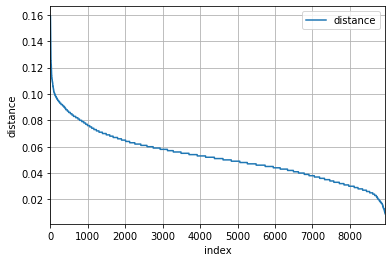

In [56]:
X_principal.sort_values(by = 'distance', ascending = False).reset_index()[['distance']].plot()
plt.xlabel('index')
plt.ylabel('distance')
plt.grid()
plt.show()

_from the above graph we see the value to be somewhere near 0.37_

In [57]:
X_principal.drop(columns = ['distance'], inplace = True)

In [58]:
# Building the clustering model

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 34).fit(X_principal) 
labels = db_default.labels_ 

In [59]:
labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [60]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6}

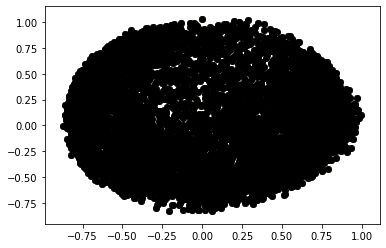

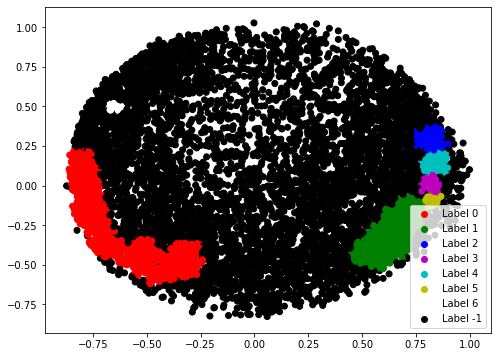

In [61]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'm'
colours[4] = 'c'
colours[5] = 'y'
colours[6] = 'w'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
t = plt.scatter(X_principal['P1'], X_principal['P2'], color ='m'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='c'); 
s = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
p = plt.scatter(X_principal['P1'], X_principal['P2'], color ='w'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(8,6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, t, y, s, p, k), ('Label 0', 'Label 1', 'Label 2','Label 3', 'Label 4','Label 5', 'Label 6', 'Label -1')) 
  
plt.show();

_PCA reduces dimensionality. It does not change the number of observations you have. Nor does it change the order of the data. The n-th observation in your original dataset will still be the n-th observation post-PCA. So we can map the clusters back to the original data._

## ___Advantages of DBSCAN___
* _Is great at separating clusters of high density versus clusters of low density within a given dataset._
* _Is great with handling outliers within the dataset._
* ___Can be used to find the Outliers in the Dataset in EDA.___

## ___Disadvantages of DBSCAN___
* _Does not work well when dealing with clusters of varying densities. While DBSCAN is great at separating high density clusters from low density clusters, DBSCAN struggles with clusters of similar density._
* _Struggles with high dimensionality data._

_[Reference 1](https://medium.com/@darkprogrammerpb/dbscan-clustering-from-scratch-199c0d8e8da1)_
_[Reference 2](https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818)_
_[Reference 3](https://www.kaggle.com/maximgolovatchev/unsupervised-learning-clustering-tutorial/notebook)_
_[Reference 4](https://www.kaggle.com/learn-forum/109334)_
_[Reference 5](https://www.kaggle.com/fazilbtopal/popular-unsupervised-clustering-algorithms)_
_[Reference 6](https://medium.com/@mohantysandip/a-step-by-step-approach-to-solve-dbscan-algorithms-by-tuning-its-hyper-parameters-93e693a91289#:~:text=Open%20in%20app-,A%20Step%20by%20Step%20approach%20to%20Solve,by%20tuning%20its%20hyper%20parameters&text=DBSCAN%20is%20a%20clustering%20method,clusters%20of%20low%20density%20region.)_